Basic Details of the dataset


In [70]:
import pandas as pd
df = pd.read_csv('/content/netflix_titles.csv')

print("Columns in the dataset",df.columns.tolist(),"\n")
print("data types of columns in the dataset:\n",df.dtypes,"\n")
print("Number of rows and columns: ",df.shape,"\n")

print("Total records of dataset: ",df.shape[0])
print("\nNumber of null values present:\n",df.isnull().sum())

print("\nUnique content types available: ",df['type'].unique())

Columns in the dataset ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'] 

data types of columns in the dataset:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object 

Number of rows and columns:  (8807, 12) 

Total records of dataset:  8807

Number of null values present:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Unique content types available:  ['Movie' 'TV Show']


Number of Movies: 6131

Number of TV Shows: 2676



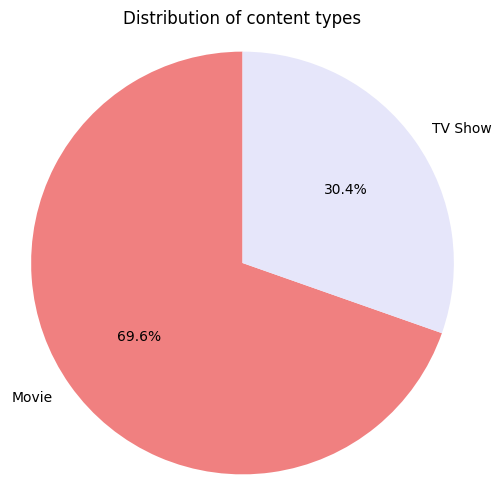

In [71]:
import matplotlib.pyplot as plt

# distribution of content type
type_counts = df['type'].value_counts()
print(f"Number of Movies: {type_counts['Movie']}\n")
print(f"Number of TV Shows: {type_counts['TV Show']}\n")
plt.figure(figsize=(6,6))
plt.pie(type_counts,labels=type_counts.index,autopct='%1.1f%%',startangle=90,colors=['lightcoral','lavender'])
plt.axis('equal')
plt.title('Distribution of content types')
plt.show()

top 10 content producing countries by types are:
        Type         Country  Count
0     Movie   United States   2752
1     Movie           India    962
2     Movie  United Kingdom    534
3     Movie          Canada    319
4     Movie          France    303
5     Movie         Germany    182
6     Movie           Spain    171
7     Movie           Japan    119
8     Movie           China    114
9     Movie          Mexico    111
10  TV Show   United States    938
11  TV Show  United Kingdom    272
12  TV Show           Japan    199
13  TV Show     South Korea    170
14  TV Show          Canada    126
15  TV Show          France     90
16  TV Show           India     84
17  TV Show          Taiwan     70
18  TV Show       Australia     66
19  TV Show           Spain     61


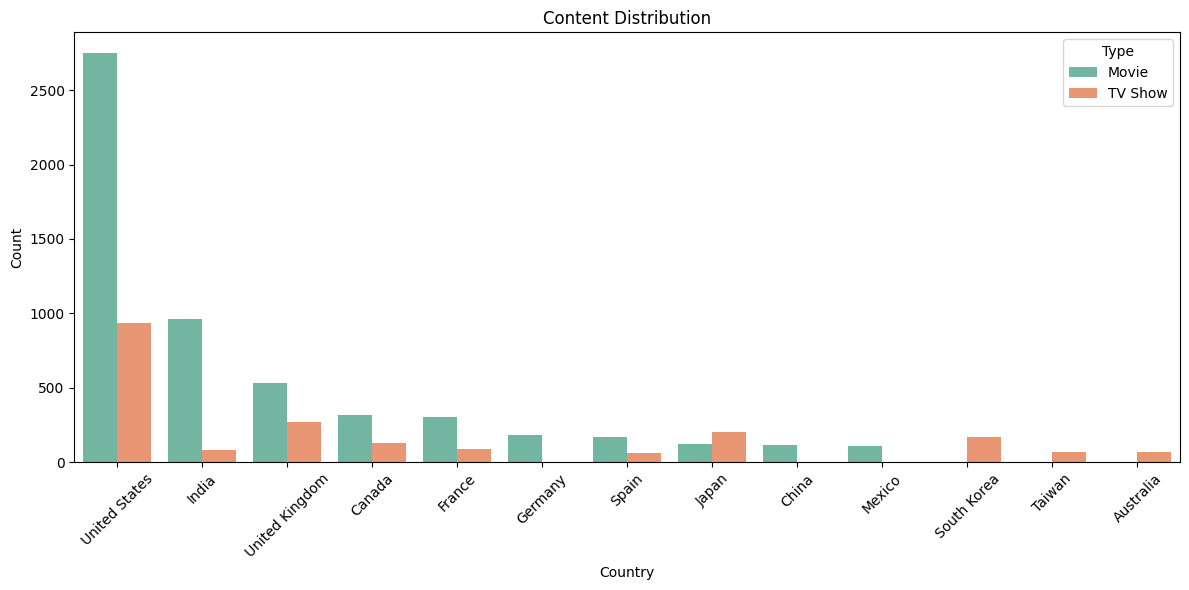

In [72]:
import seaborn as sns
#  top 10 countries producing the most content
x = df[df['country'].notna()].copy()

x['country'] = x['country'].str.split(',')
x['country'] = x['country'].apply(lambda x: [c.strip() for c in x])
x_exploded = x.explode('country')

country_counts = x_exploded.groupby('type')['country'].value_counts().groupby(level=0).head(10)
country_counts_df = country_counts.reset_index()
country_counts_df.columns = ['Type', 'Country', 'Count']

print("top 10 content producing countries by types are:\n",country_counts_df.to_string())

plt.figure(figsize=(12, 6))
sns.barplot(
    data=country_counts_df,
    x='Country',y='Count',hue='Type',
    palette='Set2'
)
plt.title("Content Distribution")
plt.xticks(rotation=45)
plt.tight_layout()

Most listed categories
 listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Kore

/tmp/ipython-input-73-1559060821.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values,y=top_genres.index,palette='plasma')


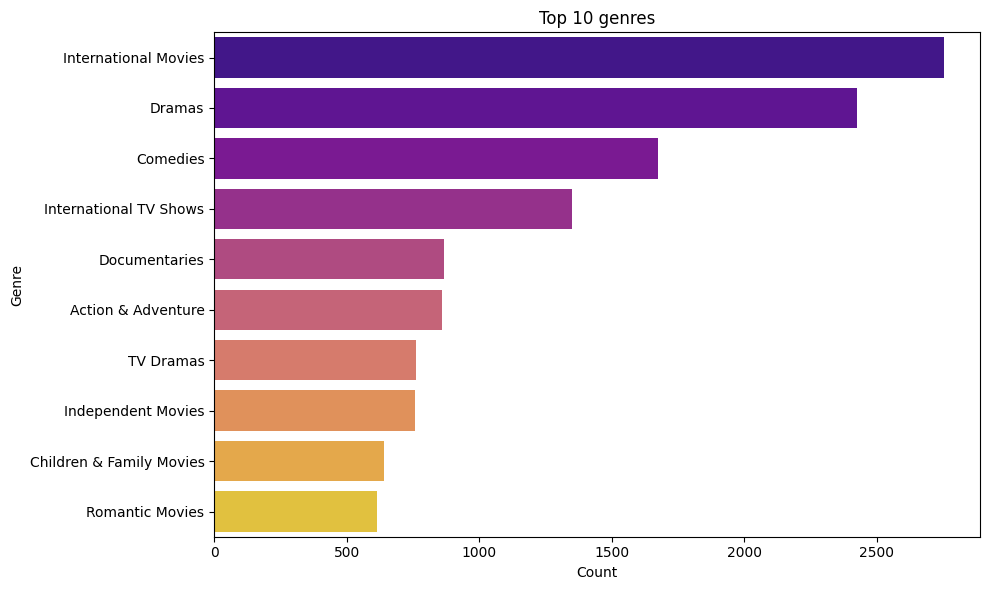

In [73]:
# common genre or category listed

z = df[df['listed_in'].notna()].copy()

z['listed_in'] = z['listed_in'].str.split(",")
z['listed_in'] = z['listed_in'].apply(lambda x: [c.strip() for c in x])
z_exploded = z.explode('listed_in')
cat_count = z_exploded['listed_in'].value_counts()
print("Most listed categories\n",cat_count)
top_genres = cat_count.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values,y=top_genres.index,palette='plasma')
plt.title("Top 10 genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [74]:
# top 10 directors with most titles
dir_count = df['director'].value_counts()
print(dir_count.head(10))

# most featured actors
w = df[df['cast'].notna()].copy()
w['cast'] = w['cast'].str.split(",")
w['cast'] = w['cast'].apply(lambda x: [c.strip() for c in x])
w_exploded = w.explode('cast')
actor_count = w_exploded['cast'].value_counts()
print(actor_count.head(10))

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64
cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Name: count, dtype: int64


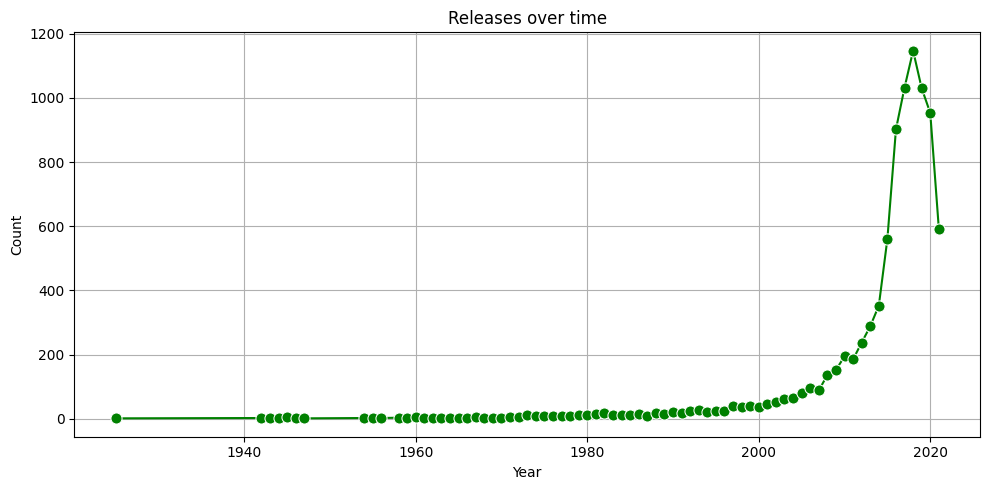

Highest releases were in the year :2018


In [75]:
# number of releases over time
release_count = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
# matplotlib
# plt.plot(release_count.index, release_count.values, marker='o', color='black')
# seaborn
ax = sns.lineplot(x=release_count.index, y=release_count.values, marker='o',color='green')
ax.lines[0].set_markersize(8)
plt.title('Releases over time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.grid(True)
plt.show()

# greatest number of releases
highest_release = release_count.idxmax()
print(f'Highest releases were in the year :{highest_release}')

     release_year     type  count
0            1925  TV Show      1
1            1942    Movie      2
2            1943    Movie      3
3            1944    Movie      3
4            1945    Movie      3
..            ...      ...    ...
114          2019  TV Show    397
115          2020    Movie    517
116          2020  TV Show    436
117          2021    Movie    277
118          2021  TV Show    315

[119 rows x 3 columns]


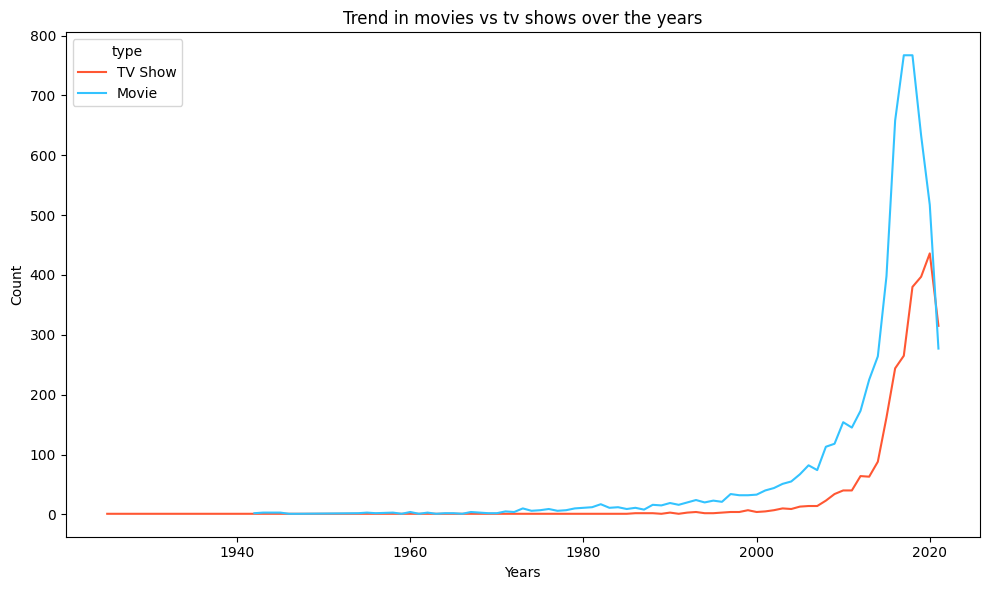

In [76]:
# trend in movies vs tv shows

grouped = df.groupby(['release_year', 'type']).size().reset_index(name='count')

print(grouped)

plt.figure(figsize=(10,6))
sns.lineplot(data=grouped, x='release_year',y='count',hue='type', palette=['#FF5733', '#33C3FF'])
plt.title('Trend in movies vs tv shows over the years')
plt.xlabel('Years')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [77]:
# typical duration of tv shows and movies

df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_num'] = df['duration_num'].dropna()
movies = df[df['type']=='Movie']
shows = df[df['type']=='TV Show']

duration_movies_mean = movies['duration_num'].mean()
duration_shows_mean = shows['duration_num'].mean()

print(f'Average duration of movies {duration_movies_mean:.2f} minutes\n')
print(f'Average duration of TV shows {duration_shows_mean:.2f} seasons\n')

# longest movies
longest_movie_row = movies.loc[movies['duration_num'].idxmax()]
longest_show = shows.loc[shows['duration_num'].idxmax()]

print(f'Longest movie is {longest_movie_row["title"]} with duration {longest_movie_row["duration_num"]} minutes\n')
print(f'Longest show is {longest_show["title"]} with {longest_show["duration_num"]} seasons\n')

# shortest movies
shortest_movie_row = movies.loc[movies["duration_num"].idxmin()]
shortest_show_row = shows.loc[shows["duration_num"].idxmin()]

print(f'Shortest movie is {shortest_movie_row["title"]} with duration {shortest_movie_row["duration_num"]} minutes\n')
print(f'Shortest show is {shortest_show_row["title"]} with duration {shortest_show_row["duration_num"]} season\n')


Average duration of movies 99.58 minutes

Average duration of TV shows 1.76 seasons

Longest movie is Black Mirror: Bandersnatch with duration 312.0 minutes

Longest show is Grey's Anatomy with 17.0 seasons

Shortest movie is Silent with duration 3.0 minutes

Shortest show is Ganglands with duration 1.0 season



In [78]:
# most rating
rating_counts = df['rating'].value_counts()
print(f'most rated content is {rating_counts.idxmax()} with {rating_counts.max()} titles')

most rated content is TV-MA with 3207 titles


/tmp/ipython-input-86-3536035022.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index,y=day_counts.values,palette='magma')
/tmp/ipython-input-86-3536035022.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index,y=month_counts.values,palette='plasma')


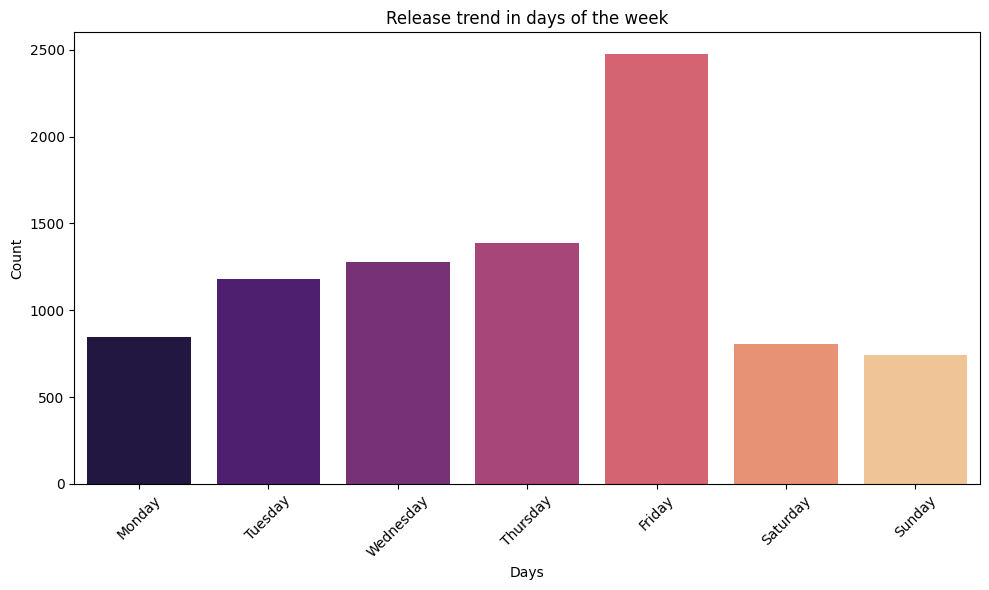

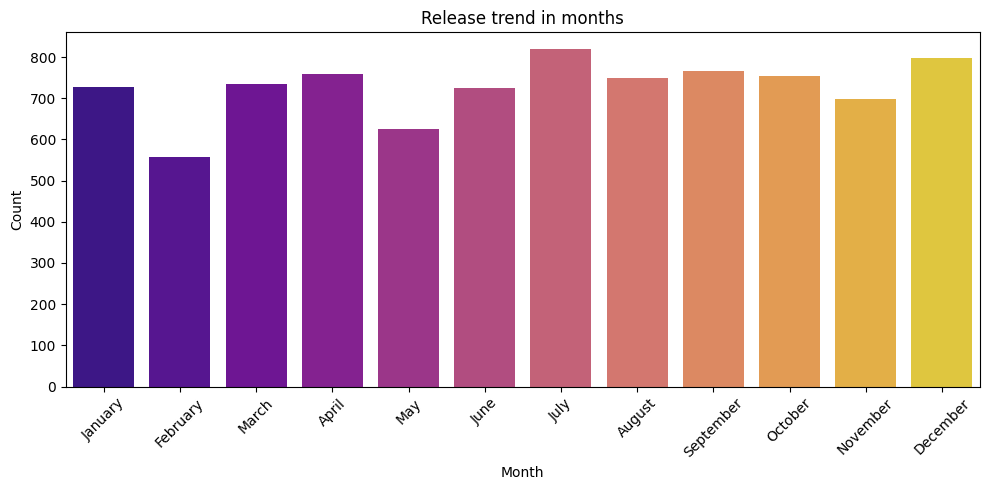

In [86]:
# patterns in content release by day or month
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['date_added']=df['date_added'].dropna()

df['added_day']=df['date_added'].dt.day_name()
df['added_month']=df['date_added'].dt.month_name()

# day trend
day_counts = df['added_day'].value_counts().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])

plt.figure(figsize=(10,6))
sns.barplot(x=day_counts.index,y=day_counts.values,palette='magma')
plt.title('Release trend in days of the week')
plt.xlabel('Days')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# month trend
month_counts = df['added_month'].value_counts().reindex([
    'January','February','March','April','May','June','July','August','September','October','November','December'
])

plt.figure(figsize=(10,5))
sns.barplot(x=month_counts.index,y=month_counts.values,palette='plasma')
plt.title('Release trend in months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
